In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import nltk
import re as re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA

#stopwords.words("english")[:10] # <-- import the english stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [70]:
df1 = pd.read_csv('/content/drive/MyDrive/fashion dataset.csv')
df2 = pd.read_csv('/content/drive/MyDrive/fashion brand details.csv')

In [71]:
df1.head()

,p_id,name,price,colour,brand,ratingCount,avg_rating,description,p_attributes
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt..."
3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.147523,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod..."
4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.078467,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo..."


In [72]:
df2.head()

,brand_id,brand_name
0,1,513
1,2,109F
2,3,20Dresses
3,4,250 Designs
4,5,3Pin


In [73]:
df1.rename(columns={'brand':'brand_name'}, inplace=True)
df1.head()

,p_id,name,price,colour,brand_name,ratingCount,avg_rating,description,p_attributes
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,Inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt..."
3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,SASSAFRAS,9124.0,4.147523,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod..."
4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,Kotty,12260.0,4.078467,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo..."


In [74]:
df1['brand_name'] = df1['brand_name'].str.lower()
df1.head()

,p_id,name,price,colour,brand_name,ratingCount,avg_rating,description,p_attributes
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,dupatta bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,5829334.0,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,roadster,5462.0,4.313255,"Mustard yellow solid sweatshirt, has a hood, t...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
2,10340119.0,Inddus Peach-Coloured & Beige Unstitched Dress...,5799.0,Peach,inddus,145.0,4.068966,Peach-Coloured and beige woven design unstitch...,"{'Bottom Fabric': 'Cotton Blend', 'Bottom Patt..."
3,10856380.0,SASSAFRAS Women Black Parallel Trousers,1499.0,Black,sassafras,9124.0,4.147523,"Black solid woven high-rise parallel trousers,...","{'Add-Ons': 'NA', 'Body Shape ID': '424', 'Bod..."
4,12384822.0,Kotty Women Black Wide Leg High-Rise Clean Loo...,1999.0,Black,kotty,12260.0,4.078467,"Black dark wash 4-pocket high-rise jeans, clea...","{'Add-Ons': 'NA', 'Brand Fit Name': 'NA', 'Clo..."


In [75]:
df2['brand_name'] = df2['brand_name'].str.lower()
df2

,brand_id,brand_name
0,1,513
1,2,109f
2,3,20dresses
3,4,250 designs
4,5,3pin
...,...,...
1015,1016,ziva fashion
1016,1017,zivame
1017,1018,ziyaa
1018,1019,zoella


In [76]:
df3= pd.merge(df1,df2,on="brand_name", how='outer')
df3.head()

,p_id,name,price,colour,brand_name,ratingCount,avg_rating,description,p_attributes,brand_id
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,dupatta bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'...",242.0
1,10711448.0,Dupatta Bazaar Women White Solid Dupatta,599.0,White,dupatta bazaar,1531.0,4.536251,White solid dupatta and has a taping borderPol...,"{'Border': 'Taping', 'Fabric': 'Poly Chiffon',...",242.0
2,14964708.0,Dupatta Bazaar Orange & Green Dyed Art Silk Ba...,899.0,Orange,dupatta bazaar,30.0,4.366667,Orange and green bandhani dyed dupatta has ban...,"{'Border': 'Woven Design', 'Fabric': 'Art Silk...",242.0
3,13552234.0,Dupatta Bazaar Black Solid Dupatta,599.0,Black,dupatta bazaar,232.0,4.547414,Black solid Dupatta and has a solid borderMate...,"{'Border': 'Solid', 'Fabric': 'Poly Chiffon', ...",242.0
4,17663032.0,Dupatta Bazaar Women's Solid Orange Dupatta,599.0,Orange,dupatta bazaar,NaN,NaN,Orange solid dupatta<br>Woven design borderPol...,"{'Border': 'Woven Design', 'Fabric': 'Poly Chi...",242.0


In [77]:
df3.tail()

,p_id,name,price,colour,brand_name,ratingCount,avg_rating,description,p_attributes,brand_id
14324,16630130.0,SHIVANGI clothing Girls Red & White Printed Re...,1595.0,Red,shivangi clothing,NaN,NaN,Red and white printed lehenga choli with dupat...,"{'Better Cotton Initiative': 'Regular', 'Blous...",811.0
14325,18395182.0,ARTICALE Women Off White Solid Slim Fit Cotton...,1699.0,Off White,articale,NaN,NaN,"Off white solid mid-rise sport shorts, has 2 p...",{'Body or Garment Size': 'To-Fit Denotes Body ...,92.0
14326,18395164.0,ARTICALE Women Lavender Slim Fit Shorts,1699.0,Lavender,articale,NaN,NaN,<ul><li>Lavender solid mid-rise regular shorts...,{'Body or Garment Size': 'To-Fit Denotes Body ...,92.0
14327,2117164.0,Noi Cream-Coloured & Brown Printed Shawl,1999.0,Cream,noi,5.0,3.4,"Cream-coloured and brown printed shawl, has fr...","{'Border': 'Printed', 'Fabric': 'Wool', 'Fabri...",637.0
14328,18055840.0,tantkatha Black Front Closure Saree Blouse Wit...,1699.0,Black,tantkatha,NaN,NaN,Black Front Closure Blouse With Embellished Ne...,{'Body or Garment Size': 'Garment Measurements...,876.0


In [78]:
df3.columns = map(str.title, df3.columns)
df3.head()

,P_Id,Name,Price,Colour,Brand_Name,Ratingcount,Avg_Rating,Description,P_Attributes,Brand_Id
0,1518329.0,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,dupatta bazaar,1321.0,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'...",242.0
1,10711448.0,Dupatta Bazaar Women White Solid Dupatta,599.0,White,dupatta bazaar,1531.0,4.536251,White solid dupatta and has a taping borderPol...,"{'Border': 'Taping', 'Fabric': 'Poly Chiffon',...",242.0
2,14964708.0,Dupatta Bazaar Orange & Green Dyed Art Silk Ba...,899.0,Orange,dupatta bazaar,30.0,4.366667,Orange and green bandhani dyed dupatta has ban...,"{'Border': 'Woven Design', 'Fabric': 'Art Silk...",242.0
3,13552234.0,Dupatta Bazaar Black Solid Dupatta,599.0,Black,dupatta bazaar,232.0,4.547414,Black solid Dupatta and has a solid borderMate...,"{'Border': 'Solid', 'Fabric': 'Poly Chiffon', ...",242.0
4,17663032.0,Dupatta Bazaar Women's Solid Orange Dupatta,599.0,Orange,dupatta bazaar,NaN,NaN,Orange solid dupatta<br>Woven design borderPol...,"{'Border': 'Woven Design', 'Fabric': 'Poly Chi...",242.0


In [79]:
df3.columns

Index(['P_Id', 'Name', 'Price', 'Colour', 'Brand_Name', 'Ratingcount',
       'Avg_Rating', 'Description', 'P_Attributes', 'Brand_Id'],
      dtype='object')

In [80]:
df3.shape

(14329, 10)

In [81]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14329 entries, 0 to 14328
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   P_Id          14311 non-null  float64
 1   Name          14310 non-null  object 
 2   Price         14310 non-null  float64
 3   Colour        14307 non-null  object 
 4   Brand_Name    14305 non-null  object 
 5   Ratingcount   6581 non-null   float64
 6   Avg_Rating    6581 non-null   float64
 7   Description   14310 non-null  object 
 8   P_Attributes  14310 non-null  object 
 9   Brand_Id      14305 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.2+ MB


In [82]:
df3[["P_Id", "Ratingcount", "Brand_Id"]] = df3[["P_Id", "Ratingcount", "Brand_Id"]].astype("Int64")
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14329 entries, 0 to 14328
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   P_Id          14311 non-null  Int64  
 1   Name          14310 non-null  object 
 2   Price         14310 non-null  float64
 3   Colour        14307 non-null  object 
 4   Brand_Name    14305 non-null  object 
 5   Ratingcount   6581 non-null   Int64  
 6   Avg_Rating    6581 non-null   float64
 7   Description   14310 non-null  object 
 8   P_Attributes  14310 non-null  object 
 9   Brand_Id      14305 non-null  Int64  
dtypes: Int64(3), float64(2), object(5)
memory usage: 1.2+ MB


In [83]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
P_Id,14311.0,1.569129e+07,3.153525e+06,70166.0,1.413618e+07,1.638217e+07,1.808452e+07,19415760.0
Price,14310.0,2.964168e+03,2.564015e+03,169.0,1.599000e+03,2.200000e+03,3.495000e+03,47999.0
Ratingcount,6581.0,1.844794e+02,7.825011e+02,1.0,9.000000e+00,2.300000e+01,8.000000e+01,21274.0
Avg_Rating,6581.0,4.101226e+00,4.756333e-01,1.0,3.888889e+00,4.180822e+00,4.392857e+00,5.0
Brand_Id,14305.0,5.316451e+02,2.925032e+02,1.0,2.780000e+02,5.510000e+02,7.830000e+02,1020.0


In [84]:
df3['Brand_Name'] = df3['Brand_Name'].str.title()
df3.head()

,P_Id,Name,Price,Colour,Brand_Name,Ratingcount,Avg_Rating,Description,P_Attributes,Brand_Id
0,1518329,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'...",242
1,10711448,Dupatta Bazaar Women White Solid Dupatta,599.0,White,Dupatta Bazaar,1531,4.536251,White solid dupatta and has a taping borderPol...,"{'Border': 'Taping', 'Fabric': 'Poly Chiffon',...",242
2,14964708,Dupatta Bazaar Orange & Green Dyed Art Silk Ba...,899.0,Orange,Dupatta Bazaar,30,4.366667,Orange and green bandhani dyed dupatta has ban...,"{'Border': 'Woven Design', 'Fabric': 'Art Silk...",242
3,13552234,Dupatta Bazaar Black Solid Dupatta,599.0,Black,Dupatta Bazaar,232,4.547414,Black solid Dupatta and has a solid borderMate...,"{'Border': 'Solid', 'Fabric': 'Poly Chiffon', ...",242
4,17663032,Dupatta Bazaar Women's Solid Orange Dupatta,599.0,Orange,Dupatta Bazaar,<NA>,NaN,Orange solid dupatta<br>Woven design borderPol...,"{'Border': 'Woven Design', 'Fabric': 'Poly Chi...",242


In [85]:
df3 = df3[["Brand_Id","P_Id","Name","Price","Colour","Brand_Name","Ratingcount","Avg_Rating","Description","P_Attributes"]]
df3.head()

,Brand_Id,P_Id,Name,Price,Colour,Brand_Name,Ratingcount,Avg_Rating,Description,P_Attributes
0,242,1518329,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321,4.548827,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,242,10711448,Dupatta Bazaar Women White Solid Dupatta,599.0,White,Dupatta Bazaar,1531,4.536251,White solid dupatta and has a taping borderPol...,"{'Border': 'Taping', 'Fabric': 'Poly Chiffon',..."
2,242,14964708,Dupatta Bazaar Orange & Green Dyed Art Silk Ba...,899.0,Orange,Dupatta Bazaar,30,4.366667,Orange and green bandhani dyed dupatta has ban...,"{'Border': 'Woven Design', 'Fabric': 'Art Silk..."
3,242,13552234,Dupatta Bazaar Black Solid Dupatta,599.0,Black,Dupatta Bazaar,232,4.547414,Black solid Dupatta and has a solid borderMate...,"{'Border': 'Solid', 'Fabric': 'Poly Chiffon', ..."
4,242,17663032,Dupatta Bazaar Women's Solid Orange Dupatta,599.0,Orange,Dupatta Bazaar,<NA>,NaN,Orange solid dupatta<br>Woven design borderPol...,"{'Border': 'Woven Design', 'Fabric': 'Poly Chi..."


In [86]:
df3['Avg_Rating']= df3['Avg_Rating'].round(1)
df3.head()

,Brand_Id,P_Id,Name,Price,Colour,Brand_Name,Ratingcount,Avg_Rating,Description,P_Attributes
0,242,1518329,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321,4.5,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,242,10711448,Dupatta Bazaar Women White Solid Dupatta,599.0,White,Dupatta Bazaar,1531,4.5,White solid dupatta and has a taping borderPol...,"{'Border': 'Taping', 'Fabric': 'Poly Chiffon',..."
2,242,14964708,Dupatta Bazaar Orange & Green Dyed Art Silk Ba...,899.0,Orange,Dupatta Bazaar,30,4.4,Orange and green bandhani dyed dupatta has ban...,"{'Border': 'Woven Design', 'Fabric': 'Art Silk..."
3,242,13552234,Dupatta Bazaar Black Solid Dupatta,599.0,Black,Dupatta Bazaar,232,4.5,Black solid Dupatta and has a solid borderMate...,"{'Border': 'Solid', 'Fabric': 'Poly Chiffon', ..."
4,242,17663032,Dupatta Bazaar Women's Solid Orange Dupatta,599.0,Orange,Dupatta Bazaar,<NA>,NaN,Orange solid dupatta<br>Woven design borderPol...,"{'Border': 'Woven Design', 'Fabric': 'Poly Chi..."


In [87]:
df3.nunique()

Brand_Id         1020
P_Id            14222
Name            13880
Price            1209
Colour             49
Brand_Name       1020
Ratingcount       829
Avg_Rating         34
Description     14233
P_Attributes    13094
dtype: int64

In [88]:
df3.isnull()

,Brand_Id,P_Id,Name,Price,Colour,Brand_Name,Ratingcount,Avg_Rating,Description,P_Attributes
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...
14324,False,False,False,False,False,False,True,True,False,False
14325,False,False,False,False,False,False,True,True,False,False
14326,False,False,False,False,False,False,True,True,False,False
14327,False,False,False,False,False,False,False,False,False,False


In [89]:
df3.isnull().sum()

Brand_Id          24
P_Id              18
Name              19
Price             19
Colour            22
Brand_Name        24
Ratingcount     7748
Avg_Rating      7748
Description       19
P_Attributes      19
dtype: int64

In [90]:
df3.duplicated().sum()

59

In [91]:
df3['P_Id'].duplicated().sum()

106

In [92]:
df3=df3.dropna(how='all')
df3

,Brand_Id,P_Id,Name,Price,Colour,Brand_Name,Ratingcount,Avg_Rating,Description,P_Attributes
0,242,1518329,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321,4.5,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,242,10711448,Dupatta Bazaar Women White Solid Dupatta,599.0,White,Dupatta Bazaar,1531,4.5,White solid dupatta and has a taping borderPol...,"{'Border': 'Taping', 'Fabric': 'Poly Chiffon',..."
2,242,14964708,Dupatta Bazaar Orange & Green Dyed Art Silk Ba...,899.0,Orange,Dupatta Bazaar,30,4.4,Orange and green bandhani dyed dupatta has ban...,"{'Border': 'Woven Design', 'Fabric': 'Art Silk..."
3,242,13552234,Dupatta Bazaar Black Solid Dupatta,599.0,Black,Dupatta Bazaar,232,4.5,Black solid Dupatta and has a solid borderMate...,"{'Border': 'Solid', 'Fabric': 'Poly Chiffon', ..."
4,242,17663032,Dupatta Bazaar Women's Solid Orange Dupatta,599.0,Orange,Dupatta Bazaar,<NA>,NaN,Orange solid dupatta<br>Woven design borderPol...,"{'Border': 'Woven Design', 'Fabric': 'Poly Chi..."
...,...,...,...,...,...,...,...,...,...,...
14324,811,16630130,SHIVANGI clothing Girls Red & White Printed Re...,1595.0,Red,Shivangi Clothing,<NA>,NaN,Red and white printed lehenga choli with dupat...,"{'Better Cotton Initiative': 'Regular', 'Blous..."
14325,92,18395182,ARTICALE Women Off White Solid Slim Fit Cotton...,1699.0,Off White,Articale,<NA>,NaN,"Off white solid mid-rise sport shorts, has 2 p...",{'Body or Garment Size': 'To-Fit Denotes Body ...
14326,92,18395164,ARTICALE Women Lavender Slim Fit Shorts,1699.0,Lavender,Articale,<NA>,NaN,<ul><li>Lavender solid mid-rise regular shorts...,{'Body or Garment Size': 'To-Fit Denotes Body ...
14327,637,2117164,Noi Cream-Coloured & Brown Printed Shawl,1999.0,Cream,Noi,5,3.4,"Cream-coloured and brown printed shawl, has fr...","{'Border': 'Printed', 'Fabric': 'Wool', 'Fabri..."


Drop row if it does not have at least 6 values that are not NaN

In [93]:
df3=df3.dropna(thresh=6)
df3.head()

,Brand_Id,P_Id,Name,Price,Colour,Brand_Name,Ratingcount,Avg_Rating,Description,P_Attributes
0,242,1518329,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321,4.5,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,242,10711448,Dupatta Bazaar Women White Solid Dupatta,599.0,White,Dupatta Bazaar,1531,4.5,White solid dupatta and has a taping borderPol...,"{'Border': 'Taping', 'Fabric': 'Poly Chiffon',..."
2,242,14964708,Dupatta Bazaar Orange & Green Dyed Art Silk Ba...,899.0,Orange,Dupatta Bazaar,30,4.4,Orange and green bandhani dyed dupatta has ban...,"{'Border': 'Woven Design', 'Fabric': 'Art Silk..."
3,242,13552234,Dupatta Bazaar Black Solid Dupatta,599.0,Black,Dupatta Bazaar,232,4.5,Black solid Dupatta and has a solid borderMate...,"{'Border': 'Solid', 'Fabric': 'Poly Chiffon', ..."
4,242,17663032,Dupatta Bazaar Women's Solid Orange Dupatta,599.0,Orange,Dupatta Bazaar,<NA>,NaN,Orange solid dupatta<br>Woven design borderPol...,"{'Border': 'Woven Design', 'Fabric': 'Poly Chi..."


In [94]:
df3= df3.drop_duplicates(subset=['P_Id'], keep='last')
df3

,Brand_Id,P_Id,Name,Price,Colour,Brand_Name,Ratingcount,Avg_Rating,Description,P_Attributes
0,242,1518329,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321,4.5,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,242,10711448,Dupatta Bazaar Women White Solid Dupatta,599.0,White,Dupatta Bazaar,1531,4.5,White solid dupatta and has a taping borderPol...,"{'Border': 'Taping', 'Fabric': 'Poly Chiffon',..."
2,242,14964708,Dupatta Bazaar Orange & Green Dyed Art Silk Ba...,899.0,Orange,Dupatta Bazaar,30,4.4,Orange and green bandhani dyed dupatta has ban...,"{'Border': 'Woven Design', 'Fabric': 'Art Silk..."
3,242,13552234,Dupatta Bazaar Black Solid Dupatta,599.0,Black,Dupatta Bazaar,232,4.5,Black solid Dupatta and has a solid borderMate...,"{'Border': 'Solid', 'Fabric': 'Poly Chiffon', ..."
4,242,17663032,Dupatta Bazaar Women's Solid Orange Dupatta,599.0,Orange,Dupatta Bazaar,<NA>,NaN,Orange solid dupatta<br>Woven design borderPol...,"{'Border': 'Woven Design', 'Fabric': 'Poly Chi..."
...,...,...,...,...,...,...,...,...,...,...
14324,811,16630130,SHIVANGI clothing Girls Red & White Printed Re...,1595.0,Red,Shivangi Clothing,<NA>,NaN,Red and white printed lehenga choli with dupat...,"{'Better Cotton Initiative': 'Regular', 'Blous..."
14325,92,18395182,ARTICALE Women Off White Solid Slim Fit Cotton...,1699.0,Off White,Articale,<NA>,NaN,"Off white solid mid-rise sport shorts, has 2 p...",{'Body or Garment Size': 'To-Fit Denotes Body ...
14326,92,18395164,ARTICALE Women Lavender Slim Fit Shorts,1699.0,Lavender,Articale,<NA>,NaN,<ul><li>Lavender solid mid-rise regular shorts...,{'Body or Garment Size': 'To-Fit Denotes Body ...
14327,637,2117164,Noi Cream-Coloured & Brown Printed Shawl,1999.0,Cream,Noi,5,3.4,"Cream-coloured and brown printed shawl, has fr...","{'Border': 'Printed', 'Fabric': 'Wool', 'Fabri..."


In [95]:
df3['P_Id'].duplicated().sum()

0

In [96]:
df3.isnull().sum()

Brand_Id           4
P_Id               0
Name               0
Price              0
Colour             3
Brand_Name         4
Ratingcount     7686
Avg_Rating      7686
Description        0
P_Attributes       0
dtype: int64

In [97]:
df3=df3.dropna(subset = ['Brand_Id']).dropna(subset = ['Colour'])
df3

,Brand_Id,P_Id,Name,Price,Colour,Brand_Name,Ratingcount,Avg_Rating,Description,P_Attributes
0,242,1518329,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321,4.5,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,242,10711448,Dupatta Bazaar Women White Solid Dupatta,599.0,White,Dupatta Bazaar,1531,4.5,White solid dupatta and has a taping borderPol...,"{'Border': 'Taping', 'Fabric': 'Poly Chiffon',..."
2,242,14964708,Dupatta Bazaar Orange & Green Dyed Art Silk Ba...,899.0,Orange,Dupatta Bazaar,30,4.4,Orange and green bandhani dyed dupatta has ban...,"{'Border': 'Woven Design', 'Fabric': 'Art Silk..."
3,242,13552234,Dupatta Bazaar Black Solid Dupatta,599.0,Black,Dupatta Bazaar,232,4.5,Black solid Dupatta and has a solid borderMate...,"{'Border': 'Solid', 'Fabric': 'Poly Chiffon', ..."
4,242,17663032,Dupatta Bazaar Women's Solid Orange Dupatta,599.0,Orange,Dupatta Bazaar,<NA>,NaN,Orange solid dupatta<br>Woven design borderPol...,"{'Border': 'Woven Design', 'Fabric': 'Poly Chi..."
...,...,...,...,...,...,...,...,...,...,...
14324,811,16630130,SHIVANGI clothing Girls Red & White Printed Re...,1595.0,Red,Shivangi Clothing,<NA>,NaN,Red and white printed lehenga choli with dupat...,"{'Better Cotton Initiative': 'Regular', 'Blous..."
14325,92,18395182,ARTICALE Women Off White Solid Slim Fit Cotton...,1699.0,Off White,Articale,<NA>,NaN,"Off white solid mid-rise sport shorts, has 2 p...",{'Body or Garment Size': 'To-Fit Denotes Body ...
14326,92,18395164,ARTICALE Women Lavender Slim Fit Shorts,1699.0,Lavender,Articale,<NA>,NaN,<ul><li>Lavender solid mid-rise regular shorts...,{'Body or Garment Size': 'To-Fit Denotes Body ...
14327,637,2117164,Noi Cream-Coloured & Brown Printed Shawl,1999.0,Cream,Noi,5,3.4,"Cream-coloured and brown printed shawl, has fr...","{'Border': 'Printed', 'Fabric': 'Wool', 'Fabri..."


In [98]:
df3=df3.fillna(0)
df3

,Brand_Id,P_Id,Name,Price,Colour,Brand_Name,Ratingcount,Avg_Rating,Description,P_Attributes
0,242,1518329,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321,4.5,White embroidered&nbsp;dupattaChiffon<br>Hand-...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'..."
1,242,10711448,Dupatta Bazaar Women White Solid Dupatta,599.0,White,Dupatta Bazaar,1531,4.5,White solid dupatta and has a taping borderPol...,"{'Border': 'Taping', 'Fabric': 'Poly Chiffon',..."
2,242,14964708,Dupatta Bazaar Orange & Green Dyed Art Silk Ba...,899.0,Orange,Dupatta Bazaar,30,4.4,Orange and green bandhani dyed dupatta has ban...,"{'Border': 'Woven Design', 'Fabric': 'Art Silk..."
3,242,13552234,Dupatta Bazaar Black Solid Dupatta,599.0,Black,Dupatta Bazaar,232,4.5,Black solid Dupatta and has a solid borderMate...,"{'Border': 'Solid', 'Fabric': 'Poly Chiffon', ..."
4,242,17663032,Dupatta Bazaar Women's Solid Orange Dupatta,599.0,Orange,Dupatta Bazaar,0,0.0,Orange solid dupatta<br>Woven design borderPol...,"{'Border': 'Woven Design', 'Fabric': 'Poly Chi..."
...,...,...,...,...,...,...,...,...,...,...
14324,811,16630130,SHIVANGI clothing Girls Red & White Printed Re...,1595.0,Red,Shivangi Clothing,0,0.0,Red and white printed lehenga choli with dupat...,"{'Better Cotton Initiative': 'Regular', 'Blous..."
14325,92,18395182,ARTICALE Women Off White Solid Slim Fit Cotton...,1699.0,Off White,Articale,0,0.0,"Off white solid mid-rise sport shorts, has 2 p...",{'Body or Garment Size': 'To-Fit Denotes Body ...
14326,92,18395164,ARTICALE Women Lavender Slim Fit Shorts,1699.0,Lavender,Articale,0,0.0,<ul><li>Lavender solid mid-rise regular shorts...,{'Body or Garment Size': 'To-Fit Denotes Body ...
14327,637,2117164,Noi Cream-Coloured & Brown Printed Shawl,1999.0,Cream,Noi,5,3.4,"Cream-coloured and brown printed shawl, has fr...","{'Border': 'Printed', 'Fabric': 'Wool', 'Fabri..."


In [99]:
df3.isnull().sum()

Brand_Id        0
P_Id            0
Name            0
Price           0
Colour          0
Brand_Name      0
Ratingcount     0
Avg_Rating      0
Description     0
P_Attributes    0
dtype: int64

In [100]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove links
    text = re.sub('&nbsp;', ' ', text)
    text = re.sub('<br>', ' ', text)
    text = re.sub('<[^<]+?>', '', text)
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [101]:
df3['Description']

0        White embroidered&nbsp;dupattaChiffon<br>Hand-...
1        White solid dupatta and has a taping borderPol...
2        Orange and green bandhani dyed dupatta has ban...
3        Black solid Dupatta and has a solid borderMate...
4        Orange solid dupatta<br>Woven design borderPol...
                               ...                        
14324    Red and white printed lehenga choli with dupat...
14325    Off white solid mid-rise sport shorts, has 2 p...
14326    <ul><li>Lavender solid mid-rise regular shorts...
14327    Cream-coloured and brown printed shawl, has fr...
14328    Black Front Closure Blouse With Embellished Ne...
Name: Description, Length: 14214, dtype: object

In [102]:
df3['Description'] = df3['Description'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
df3['Description']

0        white embroidered dupattachiffon hand wash col...
1        white solid dupatta taping borderpoly chiffon ...
2        orange green bandhani dyed dupatta bandhani te...
3        black solid dupatta solid bordermaterial poly ...
4        orange solid dupatta woven design borderpoly c...
                               ...                        
14324    red white printed lehenga choli dupatta red wh...
14325    white solid mid rise sport shorts pockets draw...
14326    lavender solid mid rise regular shortshas pock...
14327    cream coloured brown printed shawl fringes alo...
14328    black front closure blouse embellished neck v ...
Name: Description, Length: 14214, dtype: object

In [103]:
df3["P_Attributes"]=df3["P_Attributes"].apply(eval)

In [104]:
df3["P_Attributes"]

0        {'Occasion': 'Daily', 'Pattern': 'Embroidered'...
1        {'Border': 'Taping', 'Fabric': 'Poly Chiffon',...
2        {'Border': 'Woven Design', 'Fabric': 'Art Silk...
3        {'Border': 'Solid', 'Fabric': 'Poly Chiffon', ...
4        {'Border': 'Woven Design', 'Fabric': 'Poly Chi...
                               ...                        
14324    {'Better Cotton Initiative': 'Regular', 'Blous...
14325    {'Body or Garment Size': 'To-Fit Denotes Body ...
14326    {'Body or Garment Size': 'To-Fit Denotes Body ...
14327    {'Border': 'Printed', 'Fabric': 'Wool', 'Fabri...
14328    {'Body or Garment Size': 'Garment Measurements...
Name: P_Attributes, Length: 14214, dtype: object

In [106]:
df4=pd.json_normalize(df3["P_Attributes"])
df4

,Occasion,Pattern,Print or Pattern Type,Border,Fabric,Ornamentation,Technique,Wash Care,Sustainable,Wedding,...,Colour Family,Design Styling,Fabric Purity,Shape,Fusion Wear,Pattern Size,About the Brand,How to care for your denim,Collection Name,What it does for your body
0,Daily,Embroidered,Floral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Daily,Solid,Solid,Taping,Poly Chiffon,NA,NA,Hand Wash,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Daily,Dyed,Bandhani,Woven Design,Art Silk,NA,Bandhani,Machine Wash,Regular,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Daily,Solid,Solid,Solid,Poly Chiffon,NA,NA,Machine Wash,Regular,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Party,Solid,Solid,Woven Design,Poly Chiffon,NA,NA,Machine Wash,Regular,Guests & Gifting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14209,NaN,NaN,NaN,NaN,NaN,NA,NA,NaN,Regular,NA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14210,Casual,Solid,Solid,NaN,Cotton,NaN,NaN,Hand Wash,Regular,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14211,Casual,Solid,Solid,NaN,Cotton,NaN,NaN,Hand Wash,Regular,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14212,Daily,Printed,Animal,Printed,Wool,Other,NaN,NaN,NaN,NaN,...,NaN,NaN,Blended,NaN,No,Medium,NaN,NaN,NaN,NaN


In [107]:
df4=df4.dropna(thresh=df4.shape[0]*0.55,axis=1)
df4

,Occasion,Pattern,Print or Pattern Type,Fabric,Wash Care,Sustainable,Body or Garment Size,Closure,Length,Number of Pockets
0,Daily,Embroidered,Floral,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Daily,Solid,Solid,Poly Chiffon,Hand Wash,NaN,NaN,NaN,NaN,NaN
2,Daily,Dyed,Bandhani,Art Silk,Machine Wash,Regular,NaN,NaN,NaN,NaN
3,Daily,Solid,Solid,Poly Chiffon,Machine Wash,Regular,NaN,NaN,NaN,NaN
4,Party,Solid,Solid,Poly Chiffon,Machine Wash,Regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
14209,NaN,NaN,NaN,NaN,NaN,Regular,Garment Measurements in,NaN,NaN,NaN
14210,Casual,Solid,Solid,Cotton,Hand Wash,Regular,To-Fit Denotes Body Measurements in,Drawstring,Above Knee,2
14211,Casual,Solid,Solid,Cotton,Hand Wash,Regular,To-Fit Denotes Body Measurements in,Slip-On,Above Knee,2
14212,Daily,Printed,Animal,Wool,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df=df3.join(df4)
df.head()

,Brand_Id,P_Id,Name,Price,Colour,Brand_Name,Ratingcount,Avg_Rating,Description,P_Attributes,Occasion,Pattern,Print or Pattern Type,Fabric,Wash Care,Sustainable,Body or Garment Size,Closure,Length,Number of Pockets
0,242,1518329,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321,4.5,white embroidered dupattachiffon hand wash col...,"{'Occasion': 'Daily', 'Pattern': 'Embroidered'...",Daily,Embroidered,Floral,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,242,10711448,Dupatta Bazaar Women White Solid Dupatta,599.0,White,Dupatta Bazaar,1531,4.5,white solid dupatta taping borderpoly chiffon ...,"{'Border': 'Taping', 'Fabric': 'Poly Chiffon',...",Daily,Solid,Solid,Poly Chiffon,Hand Wash,NaN,NaN,NaN,NaN,NaN
2,242,14964708,Dupatta Bazaar Orange & Green Dyed Art Silk Ba...,899.0,Orange,Dupatta Bazaar,30,4.4,orange green bandhani dyed dupatta bandhani te...,"{'Border': 'Woven Design', 'Fabric': 'Art Silk...",Daily,Dyed,Bandhani,Art Silk,Machine Wash,Regular,NaN,NaN,NaN,NaN
3,242,13552234,Dupatta Bazaar Black Solid Dupatta,599.0,Black,Dupatta Bazaar,232,4.5,black solid dupatta solid bordermaterial poly ...,"{'Border': 'Solid', 'Fabric': 'Poly Chiffon', ...",Daily,Solid,Solid,Poly Chiffon,Machine Wash,Regular,NaN,NaN,NaN,NaN
4,242,17663032,Dupatta Bazaar Women's Solid Orange Dupatta,599.0,Orange,Dupatta Bazaar,0,0.0,orange solid dupatta woven design borderpoly c...,"{'Border': 'Woven Design', 'Fabric': 'Poly Chi...",Party,Solid,Solid,Poly Chiffon,Machine Wash,Regular,NaN,NaN,NaN,NaN


In [109]:
df = df.drop('P_Attributes', axis=1)
df.head()

,Brand_Id,P_Id,Name,Price,Colour,Brand_Name,Ratingcount,Avg_Rating,Description,Occasion,Pattern,Print or Pattern Type,Fabric,Wash Care,Sustainable,Body or Garment Size,Closure,Length,Number of Pockets
0,242,1518329,Dupatta Bazaar White Embroidered Chiffon Dupatta,899.0,White,Dupatta Bazaar,1321,4.5,white embroidered dupattachiffon hand wash col...,Daily,Embroidered,Floral,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,242,10711448,Dupatta Bazaar Women White Solid Dupatta,599.0,White,Dupatta Bazaar,1531,4.5,white solid dupatta taping borderpoly chiffon ...,Daily,Solid,Solid,Poly Chiffon,Hand Wash,NaN,NaN,NaN,NaN,NaN
2,242,14964708,Dupatta Bazaar Orange & Green Dyed Art Silk Ba...,899.0,Orange,Dupatta Bazaar,30,4.4,orange green bandhani dyed dupatta bandhani te...,Daily,Dyed,Bandhani,Art Silk,Machine Wash,Regular,NaN,NaN,NaN,NaN
3,242,13552234,Dupatta Bazaar Black Solid Dupatta,599.0,Black,Dupatta Bazaar,232,4.5,black solid dupatta solid bordermaterial poly ...,Daily,Solid,Solid,Poly Chiffon,Machine Wash,Regular,NaN,NaN,NaN,NaN
4,242,17663032,Dupatta Bazaar Women's Solid Orange Dupatta,599.0,Orange,Dupatta Bazaar,0,0.0,orange solid dupatta woven design borderpoly c...,Party,Solid,Solid,Poly Chiffon,Machine Wash,Regular,NaN,NaN,NaN,NaN


In [110]:
df= df.dropna(thresh=16)
df

,Brand_Id,P_Id,Name,Price,Colour,Brand_Name,Ratingcount,Avg_Rating,Description,Occasion,Pattern,Print or Pattern Type,Fabric,Wash Care,Sustainable,Body or Garment Size,Closure,Length,Number of Pockets
171,750,5829334,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462,4.3,mustard yellow solid sweatshirt hood two pocke...,Casual,Solid,Solid,Cotton,Machine Wash,NaN,To-Fit Denotes Body Measurements in,Zip,Regular,2
173,750,11489658,Roadster Women Blue Washed Regular Fit Denim S...,999.0,Blue,Roadster,472,4.3,blue washed mid rise denim shorts pockets butt...,Casual,Washed,Washed,Cotton,Machine Wash,NaN,To-Fit Denotes Body Measurements in,Button,Above Knee,5
174,750,11697268,Roadster Women White Solid Round Neck Boxy Cro...,499.0,White,Roadster,3106,4.3,white printed detail boxy cropped top round ne...,Casual,Solid,Typography,Pure Cotton,Machine Wash,Regular,To-Fit Denotes Body Measurements in,NA,Crop,NaN
175,750,12178124,Roadster Women Blue Washed Denim Jacket,1999.0,Blue,Roadster,1211,4.5,blue washed jacket spread collar pockets butto...,Casual,Solid,Solid,Cotton,Machine Wash,NaN,To-Fit Denotes Body Measurements in,Button,Regular,4
176,750,5829327,Roadster Women Coral Pink Solid Hooded Sweatshirt,1199.0,Coral,Roadster,13938,4.2,coral pink solid sweatshirt attached hood two ...,Casual,Solid,Solid,Cotton,Machine Wash,NaN,To-Fit Denotes Body Measurements in,Zip,Regular,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,822,17491608,Silvertraq Women Black Camouflage Printed Long...,5999.0,Black,Silvertraq,0,0.0,black camouflage printed sporty jacket shoulde...,Casual,Printed,Floral,Viscose Rayon,Machine Wash,Regular,Garment Measurements in,NA,Regular,NaN
14204,396,13616802,Indietoga Pink & Black Floral Printed Crepe Pl...,2317.0,Pink,Indietoga,94,4.3,pink regular topprintedwoven constructioncrepe...,Maternity,Checked,Checked,Viscose Rayon,Machine Wash,Regular,To-Fit Denotes Body Measurements in,NA,Regular,NaN
14205,322,15923566,FRENCH FLEXIOUS Women Burgundy Sweatshirt,1939.0,Burgundy,French Flexious,0,0.0,burgundy solid sweatshirt round neck na pocket...,Daily,Printed,Ethnic Motifs,Cotton,Hand Wash,Regular,Garment Measurements in,NaN,Knee Length,NA
14210,30,18515980,ADIDAS Originals Women Blue Graphic Pure Cotto...,5999.0,Blue,Adidas Originals,0,0.0,product design detailsblue printed sweatshirtr...,Casual,Solid,Solid,Cotton,Hand Wash,Regular,To-Fit Denotes Body Measurements in,Drawstring,Above Knee,2


In [111]:
df = df.fillna('NA')
df

,Brand_Id,P_Id,Name,Price,Colour,Brand_Name,Ratingcount,Avg_Rating,Description,Occasion,Pattern,Print or Pattern Type,Fabric,Wash Care,Sustainable,Body or Garment Size,Closure,Length,Number of Pockets
171,750,5829334,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462,4.3,mustard yellow solid sweatshirt hood two pocke...,Casual,Solid,Solid,Cotton,Machine Wash,NA,To-Fit Denotes Body Measurements in,Zip,Regular,2
173,750,11489658,Roadster Women Blue Washed Regular Fit Denim S...,999.0,Blue,Roadster,472,4.3,blue washed mid rise denim shorts pockets butt...,Casual,Washed,Washed,Cotton,Machine Wash,NA,To-Fit Denotes Body Measurements in,Button,Above Knee,5
174,750,11697268,Roadster Women White Solid Round Neck Boxy Cro...,499.0,White,Roadster,3106,4.3,white printed detail boxy cropped top round ne...,Casual,Solid,Typography,Pure Cotton,Machine Wash,Regular,To-Fit Denotes Body Measurements in,NA,Crop,NA
175,750,12178124,Roadster Women Blue Washed Denim Jacket,1999.0,Blue,Roadster,1211,4.5,blue washed jacket spread collar pockets butto...,Casual,Solid,Solid,Cotton,Machine Wash,NA,To-Fit Denotes Body Measurements in,Button,Regular,4
176,750,5829327,Roadster Women Coral Pink Solid Hooded Sweatshirt,1199.0,Coral,Roadster,13938,4.2,coral pink solid sweatshirt attached hood two ...,Casual,Solid,Solid,Cotton,Machine Wash,NA,To-Fit Denotes Body Measurements in,Zip,Regular,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,822,17491608,Silvertraq Women Black Camouflage Printed Long...,5999.0,Black,Silvertraq,0,0.0,black camouflage printed sporty jacket shoulde...,Casual,Printed,Floral,Viscose Rayon,Machine Wash,Regular,Garment Measurements in,NA,Regular,NA
14204,396,13616802,Indietoga Pink & Black Floral Printed Crepe Pl...,2317.0,Pink,Indietoga,94,4.3,pink regular topprintedwoven constructioncrepe...,Maternity,Checked,Checked,Viscose Rayon,Machine Wash,Regular,To-Fit Denotes Body Measurements in,NA,Regular,NA
14205,322,15923566,FRENCH FLEXIOUS Women Burgundy Sweatshirt,1939.0,Burgundy,French Flexious,0,0.0,burgundy solid sweatshirt round neck na pocket...,Daily,Printed,Ethnic Motifs,Cotton,Hand Wash,Regular,Garment Measurements in,NA,Knee Length,NA
14210,30,18515980,ADIDAS Originals Women Blue Graphic Pure Cotto...,5999.0,Blue,Adidas Originals,0,0.0,product design detailsblue printed sweatshirtr...,Casual,Solid,Solid,Cotton,Hand Wash,Regular,To-Fit Denotes Body Measurements in,Drawstring,Above Knee,2


In [112]:
df.head()

,Brand_Id,P_Id,Name,Price,Colour,Brand_Name,Ratingcount,Avg_Rating,Description,Occasion,Pattern,Print or Pattern Type,Fabric,Wash Care,Sustainable,Body or Garment Size,Closure,Length,Number of Pockets
171,750,5829334,Roadster Women Mustard Yellow Solid Hooded Swe...,1199.0,Mustard,Roadster,5462,4.3,mustard yellow solid sweatshirt hood two pocke...,Casual,Solid,Solid,Cotton,Machine Wash,NA,To-Fit Denotes Body Measurements in,Zip,Regular,2
173,750,11489658,Roadster Women Blue Washed Regular Fit Denim S...,999.0,Blue,Roadster,472,4.3,blue washed mid rise denim shorts pockets butt...,Casual,Washed,Washed,Cotton,Machine Wash,NA,To-Fit Denotes Body Measurements in,Button,Above Knee,5
174,750,11697268,Roadster Women White Solid Round Neck Boxy Cro...,499.0,White,Roadster,3106,4.3,white printed detail boxy cropped top round ne...,Casual,Solid,Typography,Pure Cotton,Machine Wash,Regular,To-Fit Denotes Body Measurements in,NA,Crop,NA
175,750,12178124,Roadster Women Blue Washed Denim Jacket,1999.0,Blue,Roadster,1211,4.5,blue washed jacket spread collar pockets butto...,Casual,Solid,Solid,Cotton,Machine Wash,NA,To-Fit Denotes Body Measurements in,Button,Regular,4
176,750,5829327,Roadster Women Coral Pink Solid Hooded Sweatshirt,1199.0,Coral,Roadster,13938,4.2,coral pink solid sweatshirt attached hood two ...,Casual,Solid,Solid,Cotton,Machine Wash,NA,To-Fit Denotes Body Measurements in,Zip,Regular,2


In [113]:
from google.colab import files
df.to_csv('Final Dataset1.csv', encoding = 'utf-8-sig', index=False) 
files.download('Final Dataset1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [130]:
df['Brand_Name'].value_counts().head(20)

Roadster                   309
Tokyo Talkies              268
Mango                      245
Sassafras                  210
H&M                        185
Urbanic                    172
Clora Creation             171
Dressberry                 152
Mast & Harbour              92
Max                         90
Bostreet                    88
Street 9                    87
Vero Moda                   81
Here&Now                    79
Fabindia                    76
Sangria                     75
Pluss                       75
Vishudh                     74
Alsace Lorraine Paris       69
Rangmanch By Pantaloons     68
Name: Brand_Name, dtype: int64

In [142]:
df['Colour'].value_counts()

Black                1269
Blue                 1185
Pink                  721
Green                 679
Navy Blue             543
White                 532
Red                   402
Grey                  350
Maroon                317
Beige                 312
Yellow                287
Mustard               210
Olive                 187
Peach                 186
Off White             185
Purple                175
Orange                166
Brown                 163
Teal                  112
Multi                  99
Cream                  95
Burgundy               93
Rust                   79
Turquoise Blue         68
Lavender               64
Sea Green              63
Gold                   55
Coral                  55
Charcoal               55
Magenta                49
Fuchsia                38
Grey Melange           38
Lime Green             33
Rose                   32
Mauve                  27
Khaki                  23
Coffee Brown           17
Fluorescent Green      12
Tan         

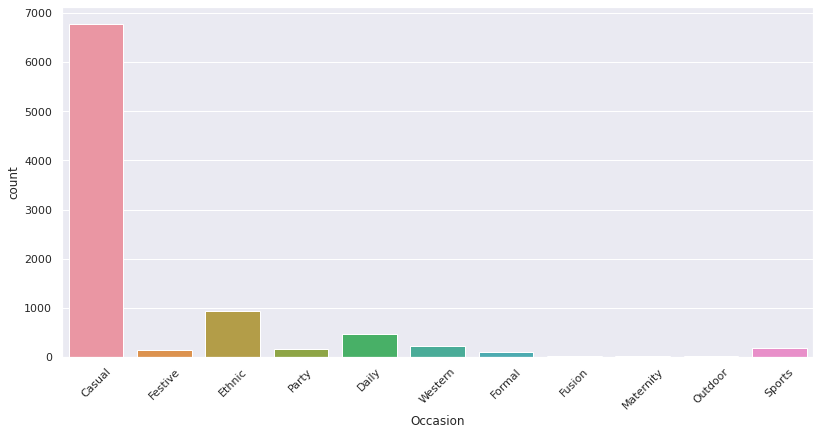

In [155]:
plt.figure(figsize = (12, 6))
sns.countplot(x = (df['Occasion']))
xt = plt.xticks(rotation=45)

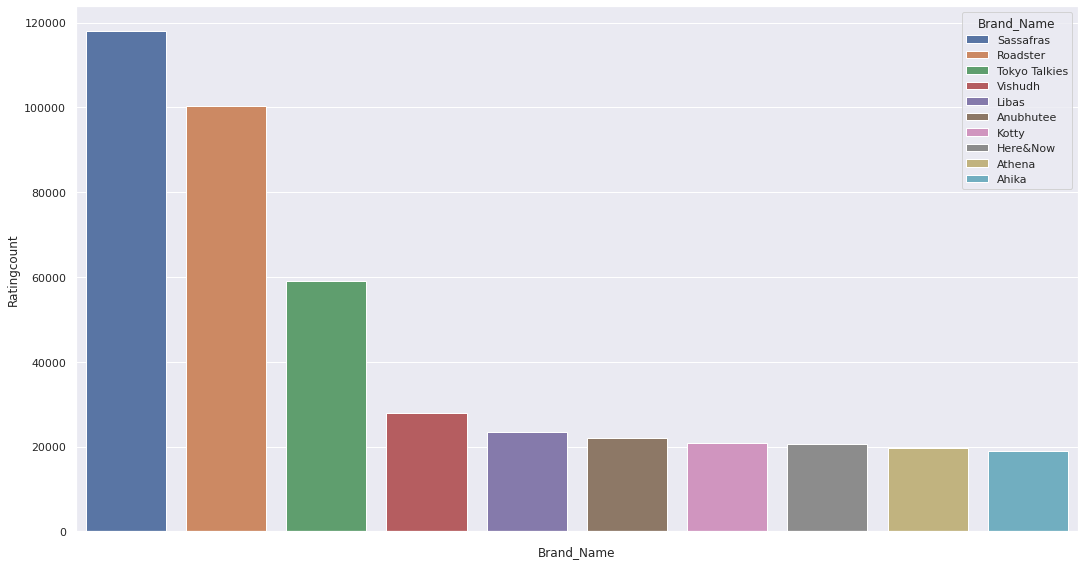

In [157]:
sns.set(rc={'figure.figsize':(16,9)})

g = df.groupby('Brand_Name', as_index=False)['Ratingcount'].sum().sort_values(by='Ratingcount', ascending=False).head(10)
sns.barplot(data=g, x='Brand_Name', y='Ratingcount', hue='Brand_Name', dodge=False).set(xticklabels=[]);

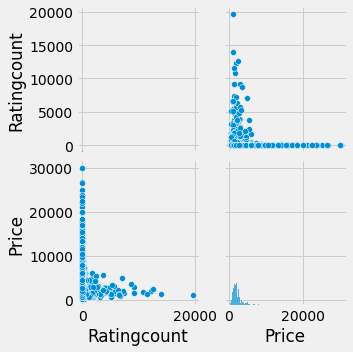

In [140]:
data=df[['Brand_Name','Ratingcount','Price']]
sns.pairplot(data)

In [158]:
df.corr()

,Brand_Id,P_Id,Price,Ratingcount,Avg_Rating
Brand_Id,1.000000,0.016150,0.042071,0.023747,0.044778
P_Id,0.016150,1.000000,0.131656,-0.244558,-0.457627
Price,0.042071,0.131656,1.000000,-0.060151,-0.180695
Ratingcount,0.023747,-0.244558,-0.060151,1.000000,0.180556
Avg_Rating,0.044778,-0.457627,-0.180695,0.180556,1.000000


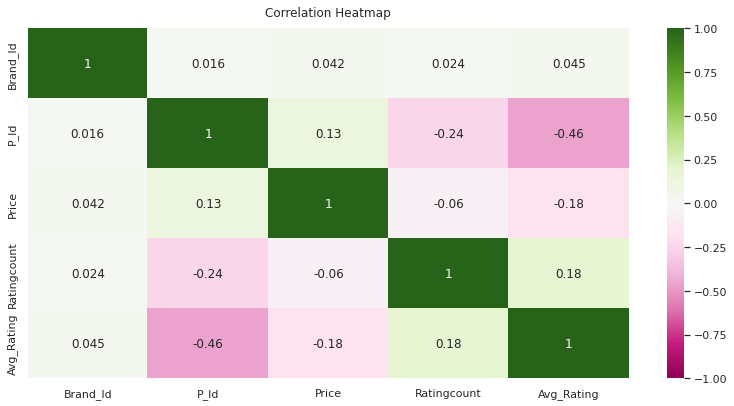

In [163]:
# Increase the size of the heatmap.
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df.corr(),cmap="PiYG", vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


Machine Learning

In [173]:
#d1= df['Description'].values
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['Description'])

In [174]:
X

<9025x1994 sparse matrix of type '<class 'numpy.float64'>'
	with 218535 stored elements in Compressed Sparse Row format>

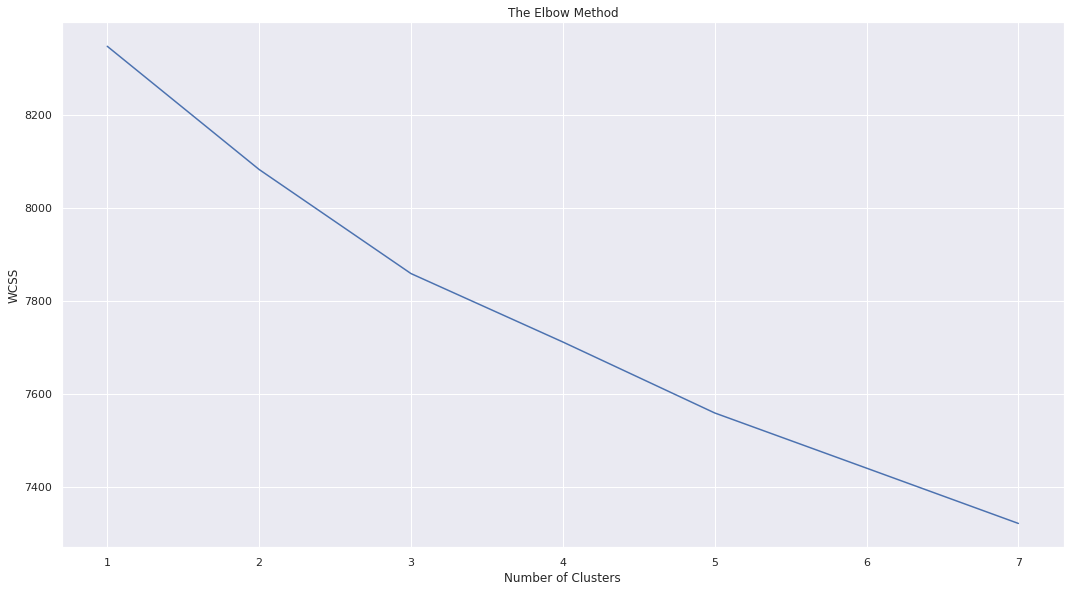

In [169]:
wcss=[]
for i in range(1,8):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,8),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [175]:
# initialize kmeans with centroids
k=3
kmeans = KMeans(n_clusters=k, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [176]:
clusters

array([1, 2, 1, ..., 1, 1, 0], dtype=int32)

In [177]:
"""This code returns the keywords for each centroid of the KMeans"""
print("Cluster centroids: \n")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 dupatta
 blouse
 fabric
 width
 lehenga
 metres
 saree
 piece
 unstitched
 design
------------
Cluster 1:
 height
 wearing
 size
 model
 sleeves
 machine
 neck
 washthe
 wash
 straight
------------
Cluster 2:
 fit
 rise
 mid
 stretchable
 regular
 cotton
 height
 size
 machine
 fade
------------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [184]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [185]:
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [186]:
# map clusters to appropriate labels 
cluster_map = {0: "Cloth_Name", 1: "Measurement", 2: "Cloth_Type"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

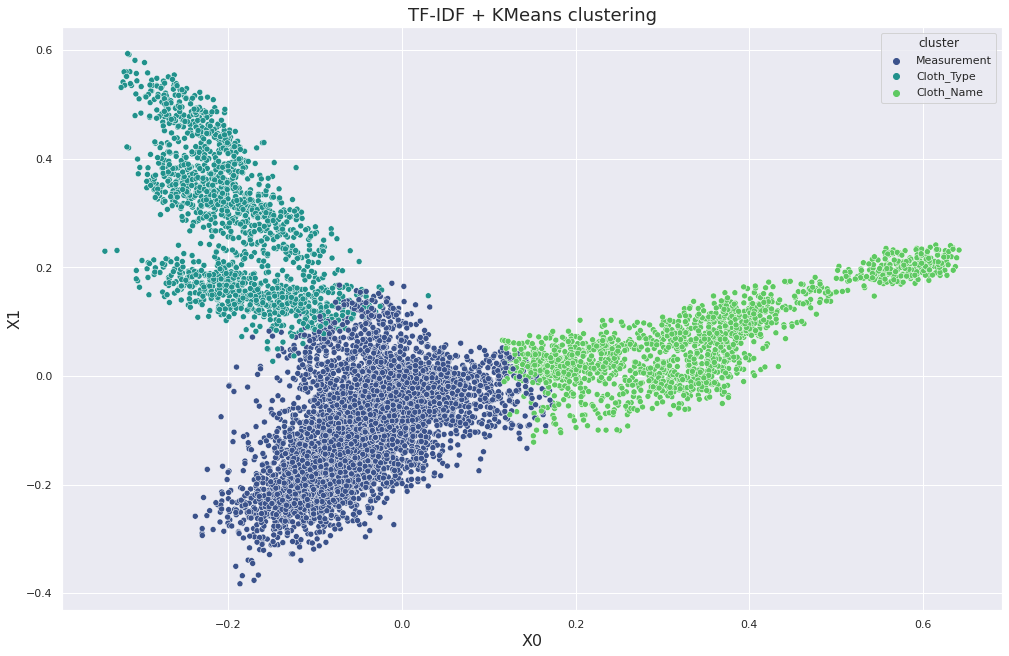

In [187]:
# set image size
plt.figure(figsize=(15, 10))
# set a title
plt.title("TF-IDF + KMeans clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

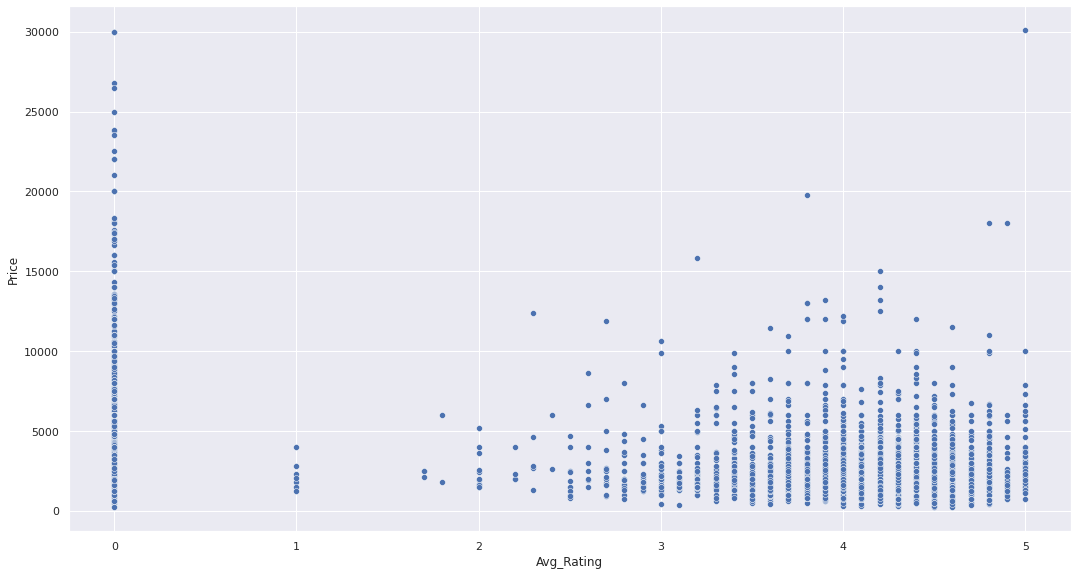

In [164]:
#plt.scatter(df['Price'], df['Avg_Rating'])Avg_Rating
sns.scatterplot(x=df['Avg_Rating'], y=df['Price'])

In [166]:
Y = df[['Price','Avg_Rating']].values
Y

array([[1.199e+03, 4.300e+00],
       [9.990e+02, 4.300e+00],
       [4.990e+02, 4.300e+00],
       ...,
       [1.939e+03, 0.000e+00],
       [5.999e+03, 0.000e+00],
       [2.699e+03, 0.000e+00]])

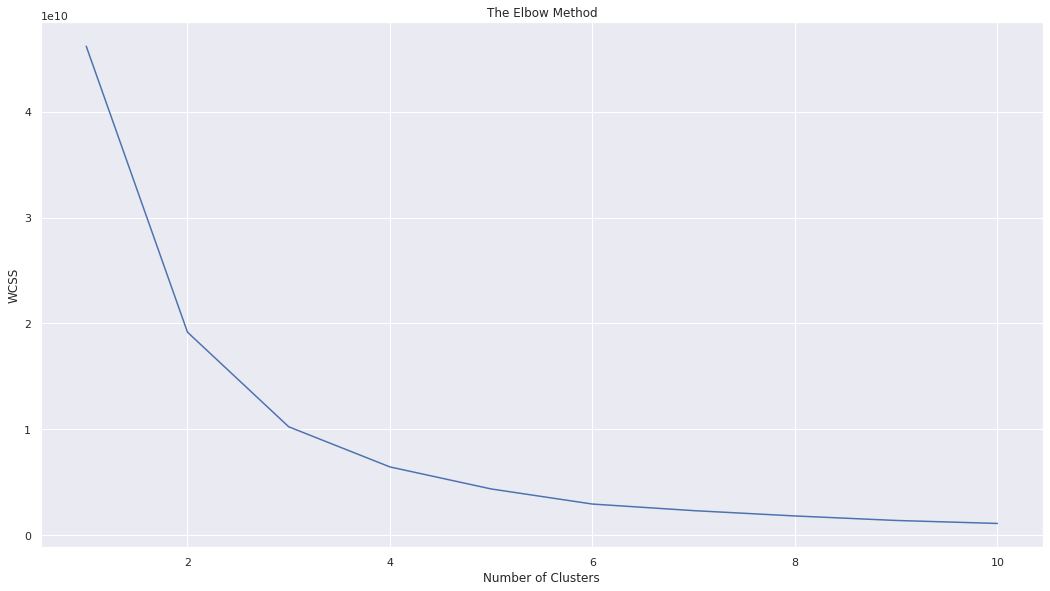

In [167]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7633560272065067
For n_clusters = 3 The average silhouette_score is : 0.6580286731030515
For n_clusters = 4 The average silhouette_score is : 0.5965955930794044
For n_clusters = 5 The average silhouette_score is : 0.5714263405144637
For n_clusters = 6 The average silhouette_score is : 0.5501490540821871


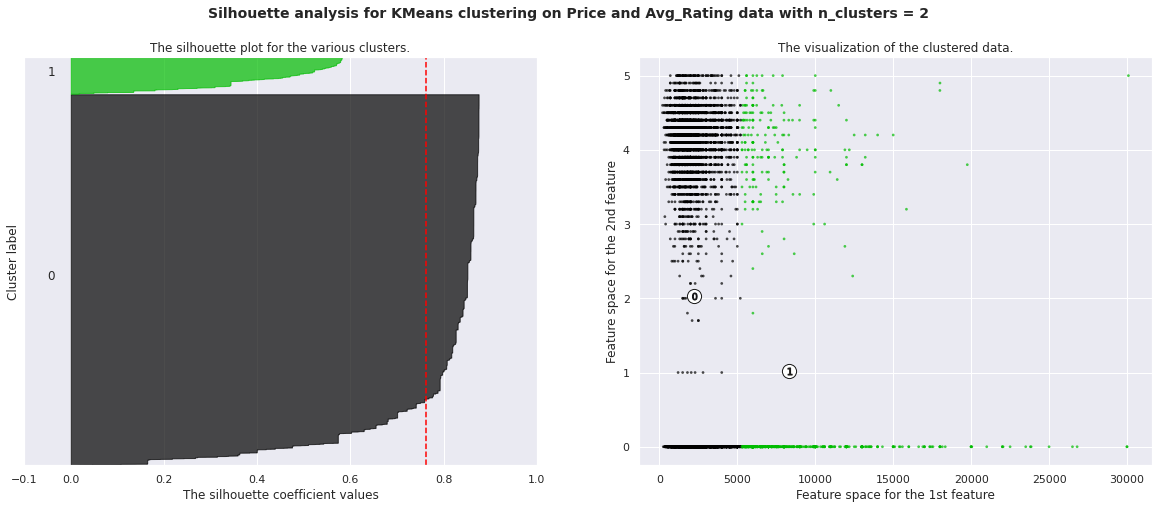

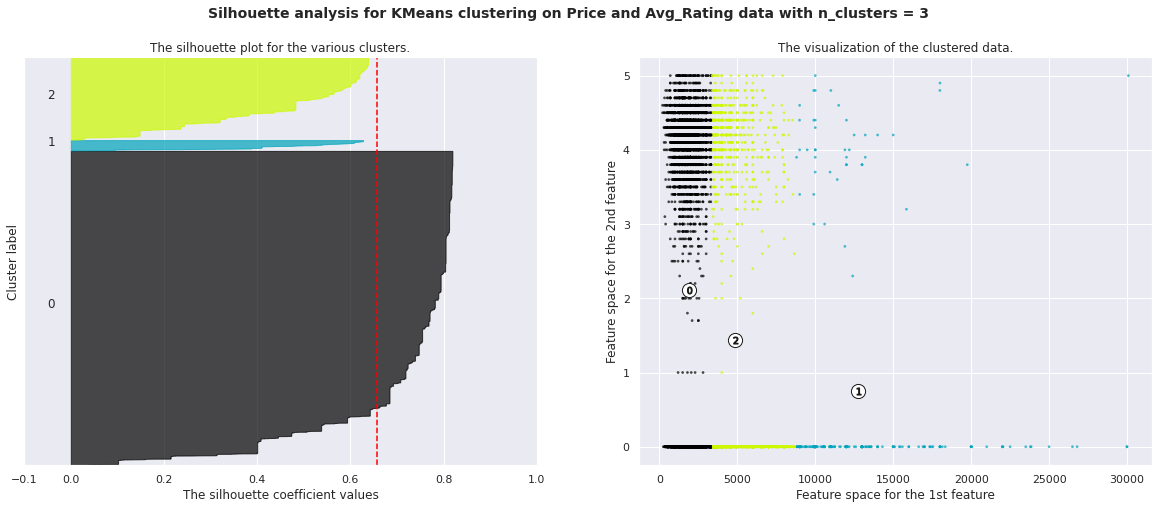

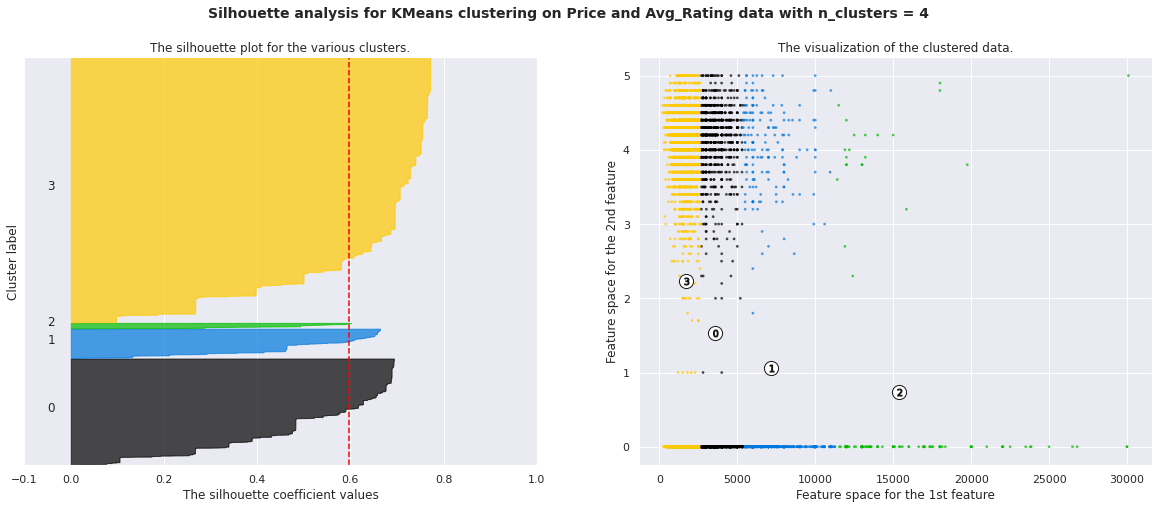

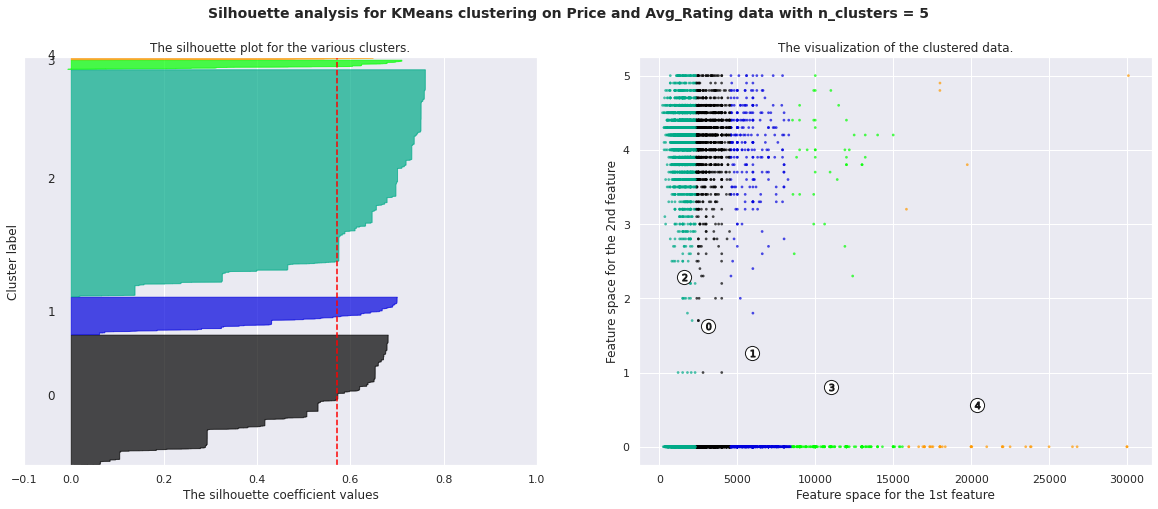

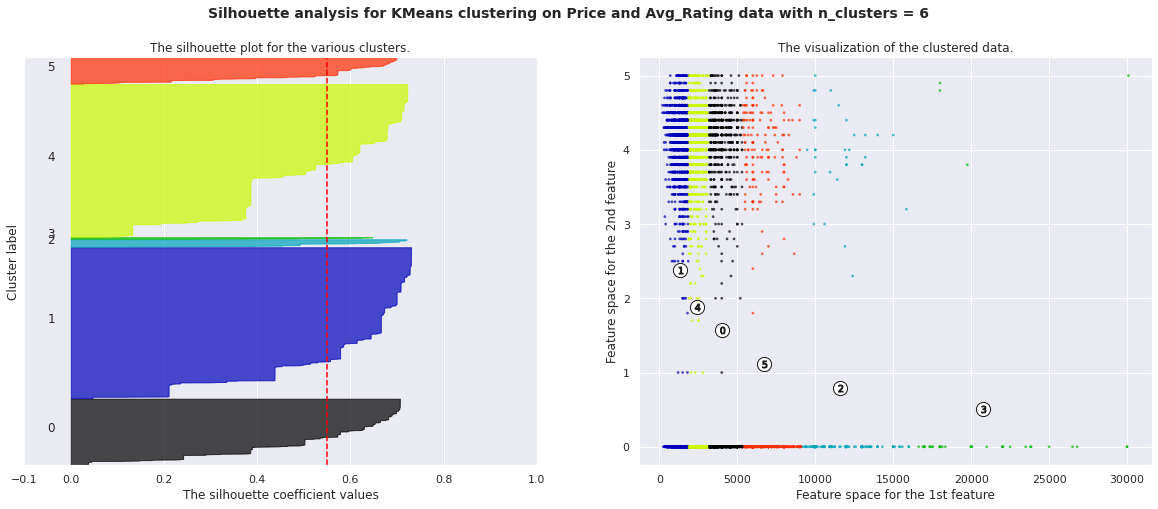

In [170]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7) 
    ax1.set_xlim([-0.1, 1])
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Y) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Y)
    # clusters
    silhouette_avg = silhouette_score(Y, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y, cluster_labels)

    y_lower = 10
    for i in range(n_clusters): 
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Y[:, 0], Y[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on Price and Avg_Rating data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()